<a href="https://colab.research.google.com/github/Satyam-kumar-yadav/BCG_Virtual_Interns/blob/main/BCg_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [55]:
data = pd.read_csv('/content/drive/MyDrive/BCG/ml_case_training_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [56]:
data2 = pd.read_csv('/content/drive/MyDrive/BCG/ml_case_training_hist_data.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [57]:
data2['id'].nunique()

16096

In [58]:
data3 = pd.read_csv('/content/drive/MyDrive/BCG/ml_case_training_output.csv')
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [59]:
merged_data = pd.merge(data, data3, on="id", how="right")
merged_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [60]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [61]:
type(merged_data)

pandas.core.frame.DataFrame

In [76]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
  ax = dataframe.plot(kind="bar", stacked=True, figsize=size_, rot=rot_, title=title_)
  annotate_stacked_bars(ax, textsize=14)
  plt.legend(["Retention", "Churn"], loc=legend_) 
  plt.ylabel("Company base (%)")
  plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
  for p in ax.patches:
    value = str(round(p.get_height(),1))
    if value == '0.0':
      continue
    ax.annotate(value, ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad), color=colour, size=textsize,)


In [62]:
activity = merged_data[["id","activity_new", "churn"]]

In [63]:
activity = activity.groupby([activity["activity_new"], activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

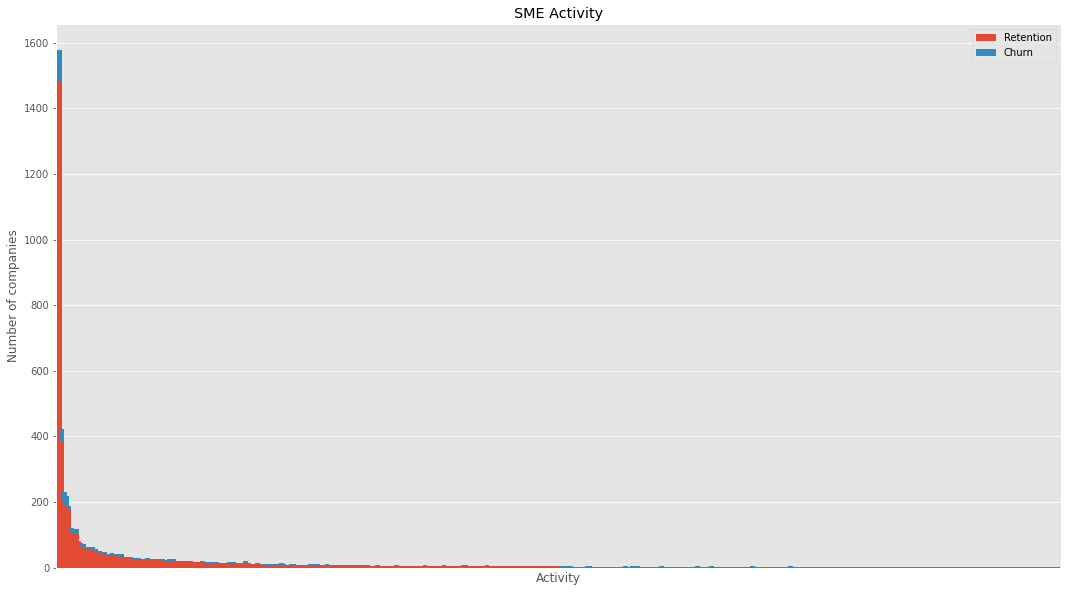

In [66]:
activity.plot(kind="bar", figsize=(18, 10), width=2, stacked=True, title="SME Activity")

plt.ylabel("Number of companies") 
plt.xlabel("Activity")
plt.legend(["Retention", "Churn"], loc="upper right") 
plt.xticks([])
plt.savefig('activity.png')
plt.show()

The distribution of the classes over the labeled data despite the lack of 60% of the entries. We see churn is not speciﬁcally related to any SME cateogry in particular.


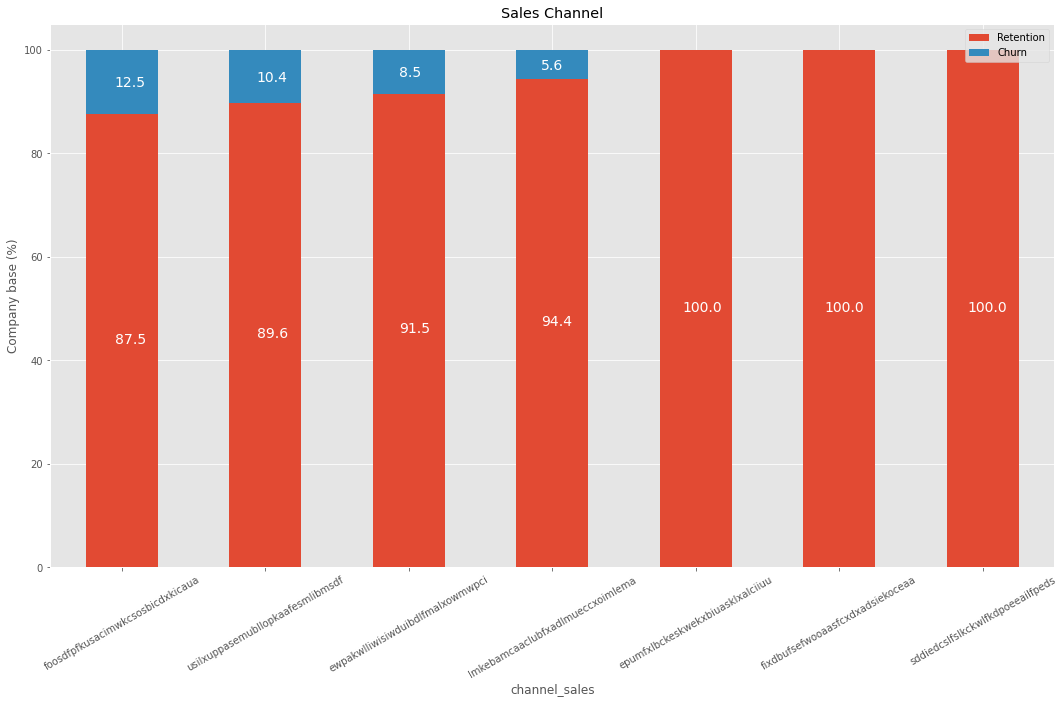

In [75]:
channel = merged_data[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"], channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)


In [77]:
consumption = merged_data[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

In [83]:
def plot_distribution(dataframe, column, ax, bins_=50):

  temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column], "Churn":dataframe[dataframe["churn"]==1][column]})
  temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True) 
  ax.set_xlabel(column)
  ax.ticklabel_format(style='plain', axis='x')

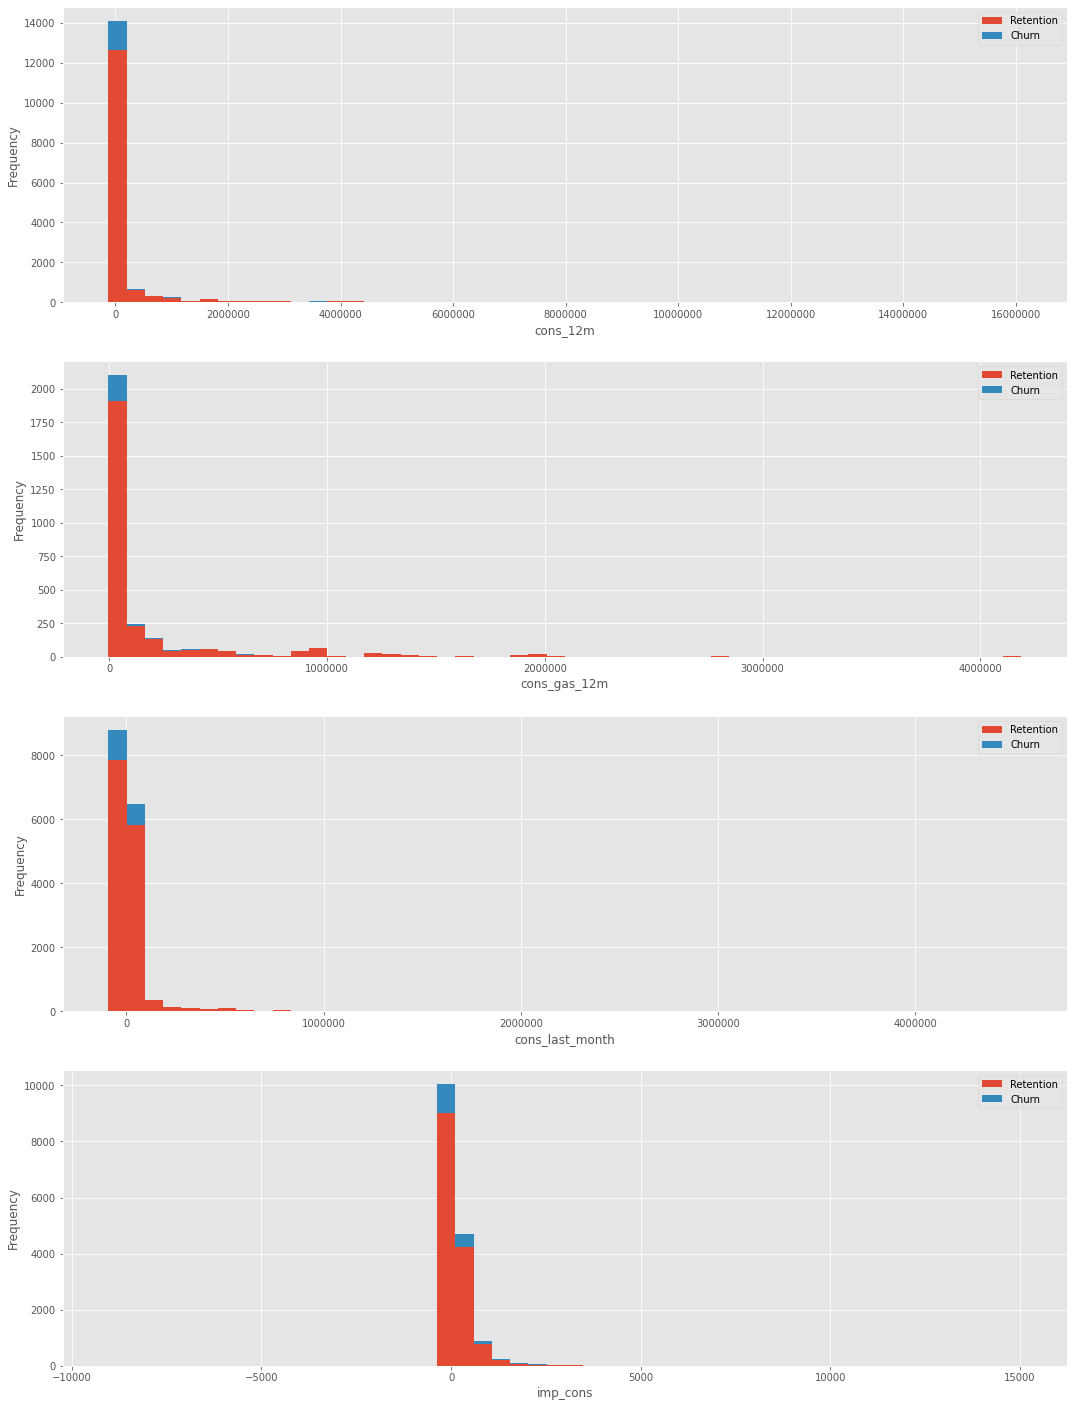

In [87]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25)) 
plot_distribution(consumption, "cons_12m", axs[0])
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1]) 
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])
fig.savefig('cunsumption.png')


We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution.

The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution of data based on a ﬁve number summary (“minimum”, ﬁrst quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed.



In [88]:
merged_data.drop(['activity_new' , 'channel_sales' , 'date_first_activ']  , axis = 1  , inplace = True)

In [89]:
merged_data['forecast_base_bill_ele'].fillna(0 , inplace = True)


In [90]:
merged_data['forecast_base_bill_year'].fillna(0 , inplace = True)
merged_data['forecast_cons'].fillna(0 , inplace = True)

In [91]:
merged_data.drop('forecast_bill_12m' , axis = 1 , inplace=True)

In [92]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   campaign_disc_ele         0 non-null      float64
 2   cons_12m                  16096 non-null  int64  
 3   cons_gas_12m              16096 non-null  int64  
 4   cons_last_month           16096 non-null  int64  
 5   date_activ                16096 non-null  object 
 6   date_end                  16094 non-null  object 
 7   date_modif_prod           15939 non-null  object 
 8   date_renewal              16056 non-null  object 
 9   forecast_base_bill_ele    16096 non-null  float64
 10  forecast_base_bill_year   16096 non-null  float64
 11  forecast_cons             16096 non-null  float64
 12  forecast_cons_12m         16096 non-null  float64
 13  forecast_cons_year        16096 non-null  int64  
 14  foreca

In [93]:
merged_data['origin_up'].fillna(merged_data['origin_up'].mode()[0] , inplace = True)

In [94]:
merged_data['net_margin'].fillna(merged_data['net_margin'].mean() , inplace = True)
merged_data['margin_gross_pow_ele'].fillna(merged_data['margin_gross_pow_ele'].mean() , inplace = True)
merged_data['margin_net_pow_ele'].fillna(merged_data['margin_net_pow_ele'].mean() , inplace = True)
merged_data['pow_max'].fillna(merged_data['pow_max'].mean() , inplace = True)

In [95]:
merged_data.drop('campaign_disc_ele' , axis = 1 , inplace= True)

In [96]:
merged_data['forecast_discount_energy'].fillna(merged_data['forecast_discount_energy'].mode()[0] , inplace = True)
merged_data['forecast_price_energy_p1'].fillna(merged_data['forecast_price_energy_p1'].mean() , inplace = True)
merged_data['forecast_price_energy_p2'].fillna(merged_data['forecast_price_energy_p2'].mean() , inplace = True)
merged_data['forecast_price_pow_p1'].fillna(merged_data['forecast_price_pow_p1'].mode()[0] , inplace = True)

In [97]:
merged_data = merged_data.dropna(how='any',axis=0)

In [98]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 0 to 16095
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15900 non-null  object 
 1   cons_12m                  15900 non-null  int64  
 2   cons_gas_12m              15900 non-null  int64  
 3   cons_last_month           15900 non-null  int64  
 4   date_activ                15900 non-null  object 
 5   date_end                  15900 non-null  object 
 6   date_modif_prod           15900 non-null  object 
 7   date_renewal              15900 non-null  object 
 8   forecast_base_bill_ele    15900 non-null  float64
 9   forecast_base_bill_year   15900 non-null  float64
 10  forecast_cons             15900 non-null  float64
 11  forecast_cons_12m         15900 non-null  float64
 12  forecast_cons_year        15900 non-null  int64  
 13  forecast_discount_energy  15900 non-null  float64
 14  foreca

In [99]:
merged_data['origin_up'].unique()

array(['ldkssxwpmemidmecebumciepifcamkci',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'lxidpiddsbxsbosboudacockeimpuepw',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


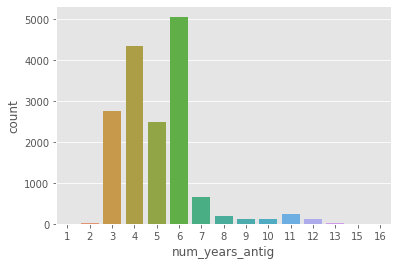

In [100]:
sns.countplot(data['num_years_antig'])
plt.show()

In [101]:
merged_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.590000e+04,1.590000e+04,1.590000e+04,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000
mean,1.930397e+05,3.183325e+04,1.929542e+04,72.940456,72.940456,44.922428,2362.513541,1904.022264,0.972075,70.336479,0.135890,0.052938,43.540313,195.739921,22.446286,21.431976,1.346667,218.172639,5.049057,20.568161,0.098742
std,6.747605e+05,1.776543e+05,8.201049e+04,334.106281,334.106281,229.604143,4026.272942,5265.060244,5.112605,79.072521,0.026180,0.048436,5.210652,494.874131,23.734118,27.989552,1.466037,365.096814,1.671224,21.743812,0.298325
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,5.888000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,512.050000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.950000,11.932500,1.000000,51.970000,4.000000,12.500000,0.000000
50%,1.528250e+04,0.000000e+00,8.970000e+02,0.000000,0.000000,0.000000,1177.335000,377.500000,0.000000,19.440000,0.142822,0.085803,44.311378,44.265000,21.050000,20.970000,1.000000,119.725000,5.000000,13.856000,0.000000
75%,4.978975e+04,0.000000e+00,4.111250e+03,0.000000,0.000000,0.000000,2685.727500,1995.250000,0.000000,131.482500,0.146348,0.098837,44.311378,217.947500,29.640000,29.640000,1.000000,275.105000,6.000000,19.800000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


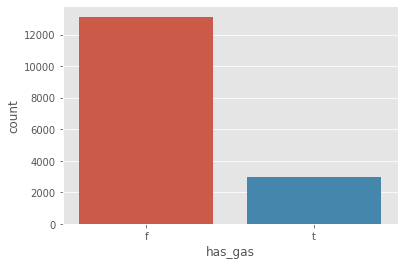

In [102]:
sns.countplot(data['has_gas'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


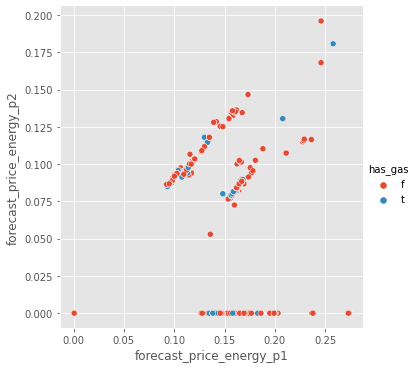

In [103]:
sns.relplot('forecast_price_energy_p1' , 'forecast_price_energy_p2', data = merged_data , kind = 'scatter' , hue = 'has_gas')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


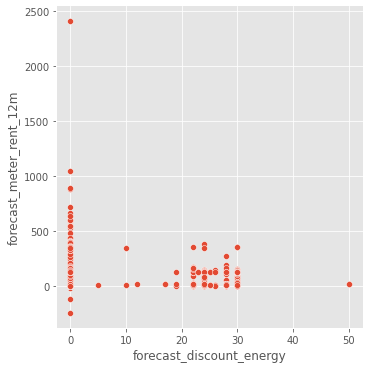

In [104]:
sns.relplot('forecast_discount_energy' ,'forecast_meter_rent_12m' , data = merged_data , kind = 'scatter' )
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


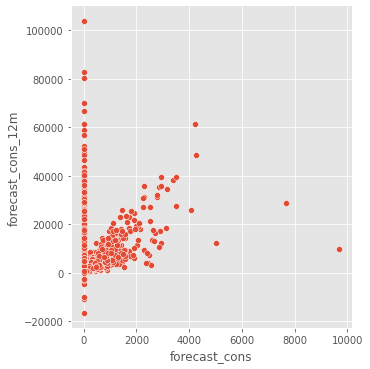

In [105]:
sns.relplot('forecast_cons' , 'forecast_cons_12m' , data = merged_data ,  kind='scatter' )
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


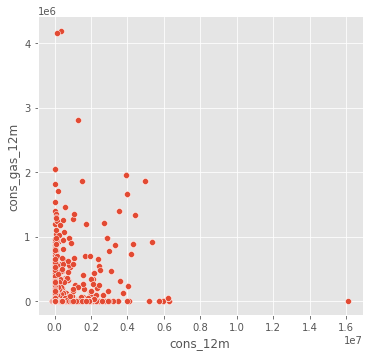

In [106]:
sns.relplot('cons_12m' , 'cons_gas_12m' , data = merged_data ,  kind='scatter' )
plt.show()

In [107]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 0 to 16095
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15900 non-null  object 
 1   cons_12m                  15900 non-null  int64  
 2   cons_gas_12m              15900 non-null  int64  
 3   cons_last_month           15900 non-null  int64  
 4   date_activ                15900 non-null  object 
 5   date_end                  15900 non-null  object 
 6   date_modif_prod           15900 non-null  object 
 7   date_renewal              15900 non-null  object 
 8   forecast_base_bill_ele    15900 non-null  float64
 9   forecast_base_bill_year   15900 non-null  float64
 10  forecast_cons             15900 non-null  float64
 11  forecast_cons_12m         15900 non-null  float64
 12  forecast_cons_year        15900 non-null  int64  
 13  forecast_discount_energy  15900 non-null  float64
 14  foreca

In [108]:
from sklearn.preprocessing import LabelEncoder
le_train1 = LabelEncoder()
merged_data['origin_up'] = le_train1.fit_transform(merged_data['origin_up'])


In [109]:
merged_data['has_gas'] = le_train1.fit_transform(merged_data['has_gas'])

In [110]:
merged_data['origin_up']

0        2
2        1
3        1
4        1
5        3
        ..
16091    3
16092    3
16093    3
16094    3
16095    2
Name: origin_up, Length: 15900, dtype: int64

In [111]:
train = merged_data.drop(['date_activ' , 'date_end' , 'date_modif_prod' , 'date_renewal' ] , axis = 1)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 0 to 16095
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15900 non-null  object 
 1   cons_12m                  15900 non-null  int64  
 2   cons_gas_12m              15900 non-null  int64  
 3   cons_last_month           15900 non-null  int64  
 4   forecast_base_bill_ele    15900 non-null  float64
 5   forecast_base_bill_year   15900 non-null  float64
 6   forecast_cons             15900 non-null  float64
 7   forecast_cons_12m         15900 non-null  float64
 8   forecast_cons_year        15900 non-null  int64  
 9   forecast_discount_energy  15900 non-null  float64
 10  forecast_meter_rent_12m   15900 non-null  float64
 11  forecast_price_energy_p1  15900 non-null  float64
 12  forecast_price_energy_p2  15900 non-null  float64
 13  forecast_price_pow_p1     15900 non-null  float64
 14  has_ga

In [113]:
label = train['churn']

In [114]:
train_data = train.drop('churn' , axis = 1)
train_data

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,0.00,0.00,0.00,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.80,-41.76,-41.76,1,1732.36,3,2,180.000
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,0.00,0.00,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,1,13.800
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,0.00,0.00,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,1,13.856
4,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,0.00,0.00,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,1,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,1399.83,1399.83,1052.37,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,0,1052.37,-3.18,-3.18,1,823.18,6,3,75.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,32270,47940,0,0.00,0.00,0.00,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,27.88,2,381.77,4,3,15.000
16092,d0a6f71671571ed83b2645d23af6de00,7223,0,181,68.64,68.64,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,0.00,1,90.34,3,3,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,0.00,0.00,0.00,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,39.84,1,20.38,4,3,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,0.00,0.00,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0,0.00,13.08,13.08,1,0.96,3,3,11.000


In [125]:
forcorr = train.drop('id' , axis = 1)

In [126]:
correlation = forcorr.corr()

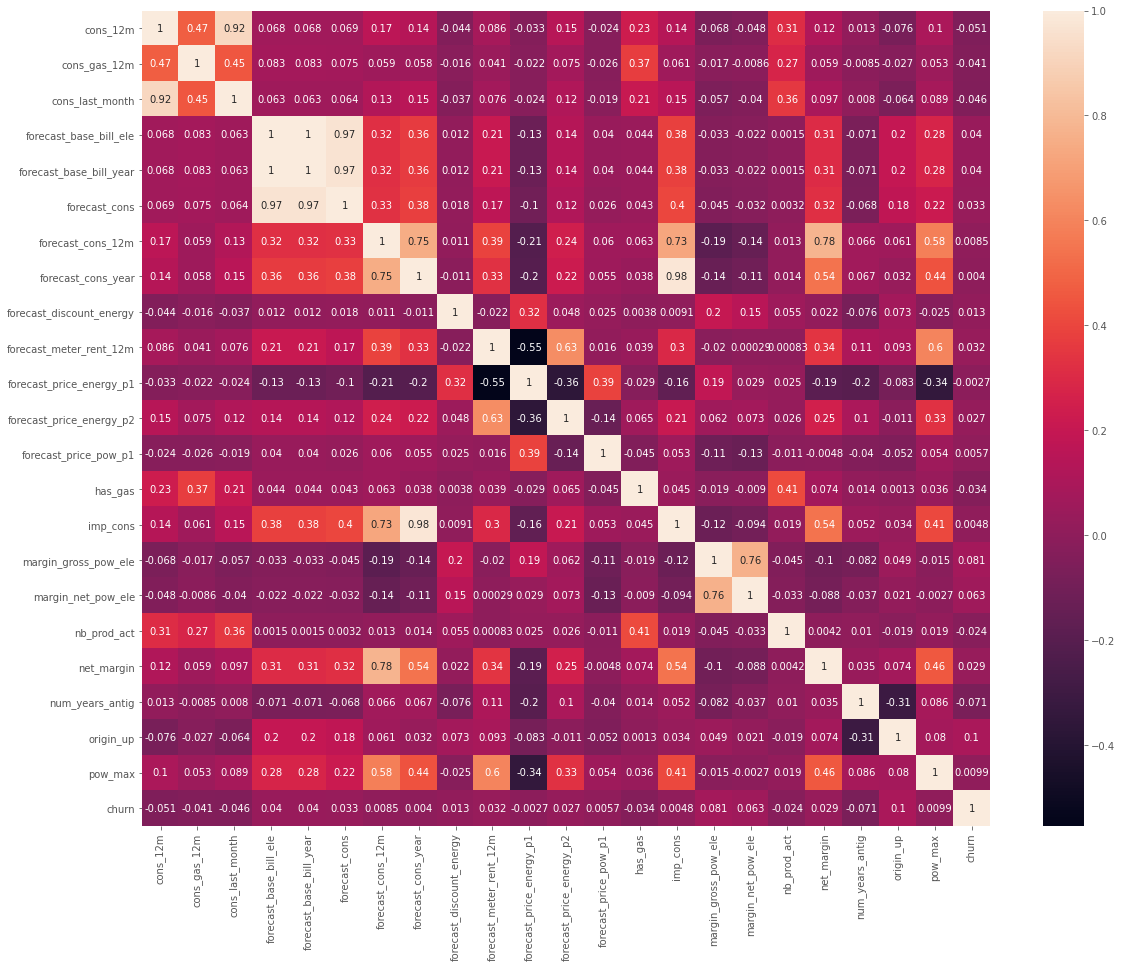

In [128]:
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('corrfeatures.png')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import  LogisticRegression 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score

In [116]:
x_train , x_test ,y_train , y_test = train_test_split(train_data , label , stratify = label )

In [117]:
x_train

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
3697,3ca83d75906d1436bc92bf48ad8f16b8,971469,0,82447,0.0,0.0,0.0,2933.08,3188,0.0,16.45,0.164058,0.086163,44.311378,0,362.92,28.34,28.34,1,245.41,6,1,13.800
3449,44ff75399c0eab73898313aa2ec21ba0,4646,34162,0,0.0,0.0,0.0,471.17,0,0.0,118.23,0.118065,0.101176,40.606701,1,0.00,49.92,49.92,2,62.74,4,3,20.000
975,e4f3b81ca9fa80a1d81418aa9d3c75e0,28084,11,2598,0.0,0.0,0.0,1852.61,1420,0.0,131.76,0.117486,0.100597,40.606701,1,138.57,29.64,29.64,2,235.19,4,1,19.800
2447,3b2e06e258ec9ad72ae8963ada2b1105,2239,0,385,0.0,0.0,0.0,334.97,385,0.0,18.42,0.145711,0.000000,44.311378,0,56.60,24.40,24.40,1,33.72,6,3,15.000
2005,b5520995cab34546dada35921506a1f8,13993,3334,0,0.0,0.0,0.0,1295.03,0,0.0,9.81,0.161748,0.084489,44.311378,1,0.00,31.20,31.20,2,145.11,5,1,13.856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,a9af37dac47ba50386ebbb600d1f4bb3,17670,0,1677,0.0,0.0,0.0,2270.61,1677,24.0,141.97,0.145677,0.125383,41.271364,0,206.00,45.45,45.45,1,168.05,4,3,20.790
15767,7c3352f1a7d33840e869a1b0fb2239e1,29030,0,4096,0.0,0.0,0.0,216.57,246,0.0,16.25,0.146694,0.000000,44.311378,0,36.55,23.76,23.76,1,21.84,6,1,10.392
4461,940ba5ba58b6c27b4f1d403712b75760,7813,0,583,0.0,0.0,0.0,455.76,233,0.0,13.81,0.144902,0.000000,44.311378,0,34.20,7.92,7.92,1,38.26,3,3,10.520
1815,c61f3d630f5c66f3c2717cd7a6a4124a,6564,0,0,0.0,0.0,0.0,996.02,0,0.0,19.68,0.145541,0.000000,44.311378,0,0.00,33.12,33.12,1,107.56,6,1,13.200


In [118]:
x_test

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
899,840df04e9c8fe811be41e9af8e811c98,55497,0,4763,0.0,0.0,0.0,5535.27,4763,0.0,129.25,0.115744,0.098858,40.606701,0,462.42,18.16,18.16,1,487.28,4,3,23.000
7981,d7e6ed37dcfdb8f2cc7f4a461a7df446,6781,0,0,0.0,0.0,0.0,962.57,0,0.0,15.85,0.143801,0.000000,44.311378,0,0.00,26.04,26.04,1,104.87,6,1,10.392
4346,e2d3c67d8af153c6d44c029a898eec90,47961,0,4465,0.0,0.0,0.0,4130.28,4465,0.0,142.21,0.100167,0.091892,58.995952,0,375.01,-1.86,-1.86,1,467.15,6,2,12.000
1344,106f05b7f4f6fab01d17cd699444cab5,834128,0,113655,0.0,0.0,0.0,3873.54,6764,0.0,27.60,0.164637,0.087381,44.311378,0,758.90,13.10,13.10,4,336.44,6,2,10.392
8196,d9df7e71a3b2c8377876e888fd6d8c4c,12231,0,0,0.0,0.0,0.0,1150.97,0,0.0,38.86,0.161743,0.083849,44.311378,0,0.00,31.20,31.20,1,111.92,6,3,13.856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13788,8bd7f9d5787ce1ffc922a82469a252ce,117845,0,8015,0.0,0.0,0.0,10196.99,8015,0.0,141.79,0.097949,0.088907,58.995952,0,677.54,0.12,0.12,1,659.76,10,2,63.000
4510,dd2a62ae9f4fb3ace3cd24d40c7e3677,3818,0,0,0.0,0.0,0.0,127.19,0,0.0,130.42,0.114667,0.099548,41.271364,0,0.00,29.92,29.92,1,16.39,6,1,15.001
13710,26097c7fcf662085cfc6e600e069f8db,6939,13097,0,0.0,0.0,0.0,1032.62,0,0.0,19.37,0.144902,0.000000,44.311378,1,0.00,14.88,14.88,2,90.22,4,3,12.500
6057,d6b41384b21713f2a64dd89591fb508e,1332,0,0,0.0,0.0,0.0,196.60,0,0.0,18.28,0.145711,0.000000,44.311378,0,0.00,18.56,18.56,1,15.49,5,1,11.400


In [119]:
x_train = x_train.drop('id' , axis = 1)

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [121]:
train_id = x_test['id']

In [122]:
x_test = x_test.drop('id' , axis = 1)

In [123]:
x_train

array([[ 1.15631502, -0.17789219,  0.8447261 , ...,  0.5659848 ,
        -1.41875561, -0.30745191],
       [-0.2816945 ,  0.01707654, -0.25732369, ..., -0.62679929,
         0.9261731 , -0.02995321],
       [-0.24683386, -0.17782941, -0.22259683, ..., -0.62679929,
        -1.41875561, -0.03890479],
       ...,
       [-0.27698405, -0.17789219, -0.24953086, ..., -1.22319133,
         0.9261731 , -0.45425767],
       [-0.27884175, -0.17789219, -0.25732369, ...,  0.5659848 ,
        -1.41875561, -0.33430662],
       [-0.28554229, -0.17789219, -0.25529194, ..., -1.22319133,
         0.9261731 , -0.25374248]])

In [124]:
x_test = sc.transform(x_test)

In [47]:
model = RandomForestClassifier()
model.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(x_test)

In [49]:
print(confusion_matrix(y_test, y_pred, labels=[0 , 1]))

[[3572   11]
 [ 375   17]]


In [50]:
print(accuracy_score(y_test , y_pred))

0.9028930817610062
